In [1]:
# import our usual things
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
gdp = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/spring2020/master/week01/data/GDP.csv")

In [3]:
gdp.head()

DATE      GDP
0  1947-01-01  243.164
1  1947-04-01  245.968
2  1947-07-01  249.585
3  1947-10-01  259.745
4  1948-01-01  265.742

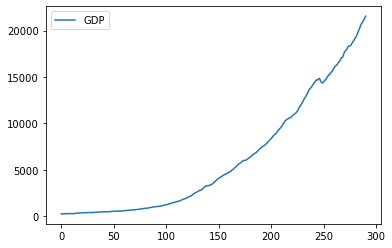

In [5]:
gdp.plot() # this was a way to make quick plots with Pandas
# we're going to go back to this for geopandas

In [6]:
import geopandas

In [7]:
geopandas.datasets.available # these datasets come with geopandas

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [8]:
# gdf = geometric dataframe
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))

In [9]:
# take a quick look at this data
gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [10]:
# use a lot of the Pandas commands
gdf.describe()

BoroCode     Shape_Leng    Shape_Area
count  5.000000       5.000000  5.000000e+00
mean   3.000000  558317.333911  1.685981e+09
std    1.581139  249002.452978  9.034868e+08
min    1.000000  330470.010332  6.364715e+08
25%    2.000000  359299.096471  1.186925e+09
50%    3.000000  464392.991824  1.623820e+09
75%    4.000000  741080.523166  1.937479e+09
max    5.000000  896344.047763  3.045213e+09

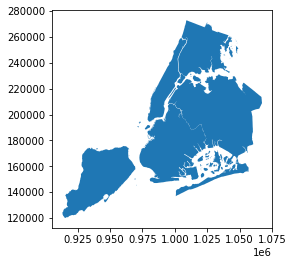

In [11]:
# we can also use Pandas-like commands to do simple plots
gdf.plot()

In [15]:
# the fact that we have "weird" labels for x/y (NOT lat/long) is 
#. telling us that we have a specific projection from the 
#. sphere onto this 2D surface
gdf.crs # CRS = coordinate reference system

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
# change the coordinate refernce system
gdf = gdf.to_crs(epsg=4326) # changed to a more "typical" projection 
#  that has lat/long

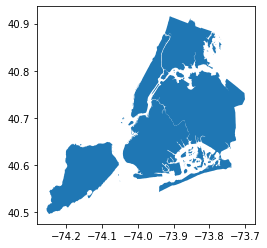

In [16]:
gdf.plot()

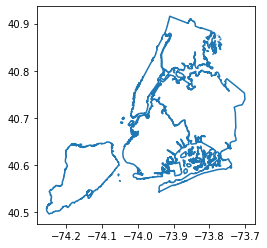

In [17]:
# so because we are using geometric data we can do geometric-specific type plots
gdf.boundary.plot()

In [18]:
#gdf.centroid? # ignore this

There are some geometric specific functions (`.centroid`, `.affline_transformation`) that are functions in `geopandas` that are not in `pandas`.

The `contextily` package is useful for putting our maps in context.

In [19]:
import contextily as ctx

The defaults for contextily are Web Mercator so we are going to use this as our projection.

In [21]:
gdf = gdf.to_crs(epsg=3857) # 3857 is the "Web Mercator" projection

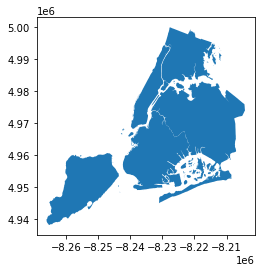

In [22]:
gdf.plot()

I'm going to combine those `fig,ax` kinds of calls with this geopandas plotting routine.

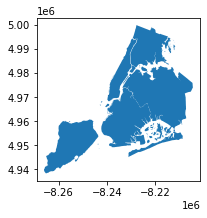

In [24]:
fig, ax = plt.subplots(1,1, figsize=(6,3))

gdf.plot(ax=ax) # specifying that we want to plot on the ax object we just created

plt.show()

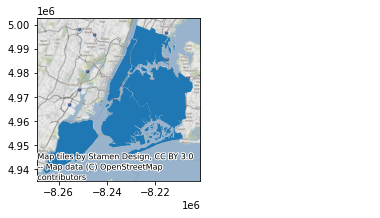

In [25]:
fig, ax = plt.subplots(1,1, figsize=(6,3))

gdf.plot(ax=ax) # specifying that we want to plot on the ax object we just created
ctx.add_basemap(ax=ax) # plotting a base map on the bottom of our geometric data

plt.show()

In [26]:
# I'm going to try to break things by giving my gdf geometric data a different CRS
# from the the defaults of contextily
gdf = gdf.to_crs(epsg=4326) # lat/long

/opt/anaconda3/envs/myNewEnv2/lib/python3.7/site-packages/contextily/tile.py:629: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


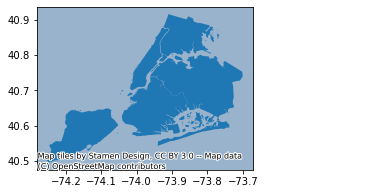

In [28]:
fig, ax = plt.subplots(1,1, figsize=(6,3))

gdf.plot(ax=ax) # specifying that we want to plot on the ax object we just created
ctx.add_basemap(ax=ax) # plotting a base map on the bottom of our geometric data

plt.show()
# here we are trying to overlap maps with different CRS so they are pointing to different
# locations on the Earth

Going back to the same CRS for both contextily and geopandas data:

In [29]:
gdf = gdf.to_crs(epsg=3857) # 3857 is the "Web Mercator" projection

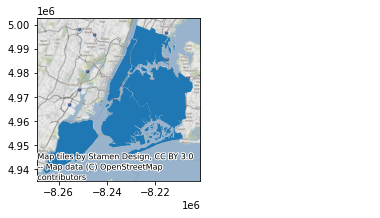

In [30]:
fig, ax = plt.subplots(1,1, figsize=(6,3))

gdf.plot(ax=ax) # specifying that we want to plot on the ax object we just created
ctx.add_basemap(ax=ax) # plotting a base map on the bottom of our geometric data

plt.show()

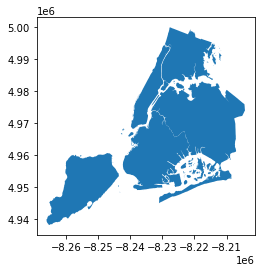

In [31]:
gdf.plot() # this is good for "quick" plots

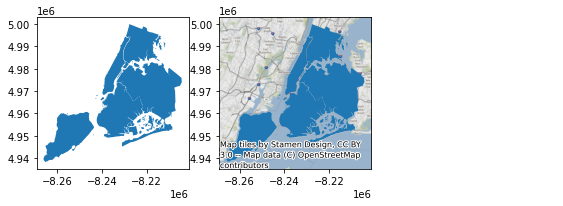

In [35]:
fig, ax = plt.subplots(1,2, figsize=(6,3))

gdf.plot(ax=ax[0]) # specifying that we want to plot on the ax object we just created

gdf.plot(ax=ax[1]) # specifying that we want to plot on the ax object we just created
ctx.add_basemap(ax=ax[1]) # plotting a base map on the bottom of our geometric data

plt.show()

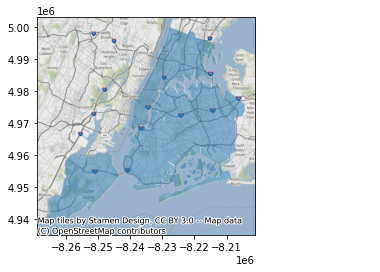

In [43]:
# let's play around with how our 2 maps are plotting together
fig, ax = plt.subplots(1,1, figsize=(7,4))

gdf.plot(ax=ax, alpha=0.5) # changing the transparency of our top plot to 50% transparent
ctx.add_basemap(ax=ax) # plotting a base map on the bottom of our geometric data

plt.show()

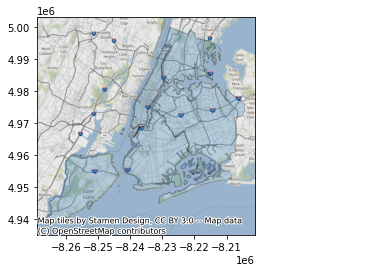

In [46]:
# let's play around with how our 2 maps are plotting together
fig, ax = plt.subplots(1,1, figsize=(7,4))

gdf.plot(ax=ax, alpha=0.25, edgecolor='black') # 25% transparent, black outline of boundaries
ctx.add_basemap(ax=ax) # plotting a base map on the bottom of our geometric data

plt.show()

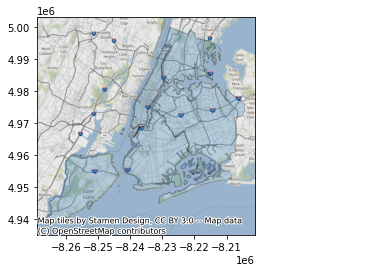

In [48]:
# whole process
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
gdf = gdf.to_crs(epsg=3857) # 3857 is the "Web Mercator" projection

# let's play around with how our 2 maps are plotting together
fig, ax = plt.subplots(1,1, figsize=(7,4))

gdf.plot(ax=ax, alpha=0.25, edgecolor='black') # 25% transparent, black outline of boundaries
ctx.add_basemap(ax=ax) # plotting a base map on the bottom of our geometric data

plt.show()

We are using the GIS interface from Cambridge, MA to plot some maps and mappable data.

We are using the "Bridges" basemap from: http://cambridgegis.github.io/gisdata.html

In [50]:
# this is NOT the raw data so we get an error
#bridges = geopandas.read_file('https://github.com/cambridgegis/cambridgegis_data/blob/master/Basemap/Bridges/BASEMAP_Bridges.geojson')

In [51]:
bridges = geopandas.read_file('https://raw.githubusercontent.com/cambridgegis/cambridgegis_data/master/Basemap/Bridges/BASEMAP_Bridges.geojson')

In [61]:
# reading in locally
bridges_local = geopandas.read_file('BASEMAP_Bridges.geojson')
#bridges_local = geopandas.read_file('/Users/jillnaiman/Downloads/....')

In [62]:
bridges_local.head()

TYPE                                           geometry
0     RIVER BRIDGE  POLYGON ((-71.11108 42.35218, -71.11078 42.352...
1     RIVER BRIDGE  POLYGON ((-71.11075 42.35259, -71.11069 42.353...
2  RAILROAD BRIDGE  POLYGON ((-71.10877 42.35368, -71.10877 42.353...
3      ROAD BRIDGE  POLYGON ((-71.10992 42.35374, -71.10991 42.353...
4     RIVER BRIDGE  POLYGON ((-71.09085 42.35333, -71.09098 42.353...

In [53]:
bridges.head()

TYPE                                           geometry
0     RIVER BRIDGE  POLYGON ((-71.11108 42.35218, -71.11078 42.352...
1     RIVER BRIDGE  POLYGON ((-71.11075 42.35259, -71.11069 42.353...
2  RAILROAD BRIDGE  POLYGON ((-71.10877 42.35368, -71.10877 42.353...
3      ROAD BRIDGE  POLYGON ((-71.10992 42.35374, -71.10991 42.353...
4     RIVER BRIDGE  POLYGON ((-71.09085 42.35333, -71.09098 42.353...

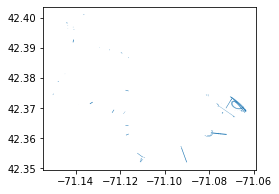

In [54]:
fig, ax = plt.subplots(1,1, figsize=(7,3))

bridges.plot(ax=ax)

plt.show()

In [55]:
# first thing: change the CRS of our data to web mercator
bridges = bridges.to_crs(epsg=3857)

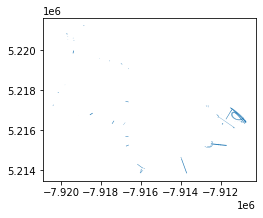

In [56]:
# redo the basic plot with the new CRS
fig, ax = plt.subplots(1,1, figsize=(7,3))

bridges.plot(ax=ax)

plt.show()

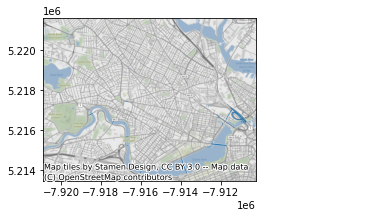

In [57]:
# using contextily to add a basemap underneath
fig, ax = plt.subplots(1,1, figsize=(7,3))

bridges.plot(ax=ax)
ctx.add_basemap(ax=ax)

plt.show()

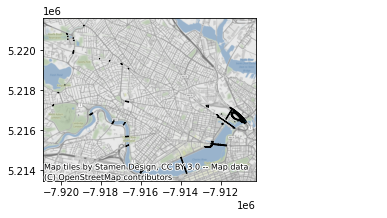

In [60]:
# change colors to hopefully get a better view
fig, ax = plt.subplots(1,1, figsize=(7,3))

bridges.plot(ax=ax, edgecolor='black')
ctx.add_basemap(ax=ax)

plt.show()

## Take a little interlude for interactive widgets

In [63]:
import ipywidgets # adds interactivity

We are going to start putting "hats" on our functions using "decorators" -- @

We are going to first "decorate" a pretty pointless function that will just print stuff.

In [65]:
print('Hi there!') # the default "print" that comes with Python

Hi there!


In [67]:
phrase = 'I am a phrase.'

print(phrase)

I am a phrase.


In [70]:
# make a very pointless function that essentially "wraps" around the default "print" function

# defining phase of making a new function
def my_print_function(sentence):
    print(sentence)

In [71]:
# calling phase
my_print_function('hi there')

hi there


In [72]:
my_print_function('hello')

hello


In [75]:
# redefine my function with an ipywidgets.interact decorator
@ipywidgets.interact(sentence='') # this has to go RIGHT ON TOP of our function defintion
def my_print_function(sentence):
    print(sentence)

interactive(children=(Text(value='', description='sentence'), Output()), _dom_classes=('widget-interact',))

In [76]:
# this is a comment
5+6

11

In [77]:
sentence_list = ['I am a sentence.', 'Such a cool sentence!', 'Hello.']

@ipywidgets.interact(sentence=sentence_list) # this has to go RIGHT ON TOP of our function defintion
def my_print_function(sentence):
    print(sentence)

interactive(children=(Dropdown(description='sentence', options=('I am a sentence.', 'Such a cool sentence!', '…

`ipywidgets` are very specific to jupyter notebooks.

Steps to making interactive functions -- progressively build up interactivity.

1. Make a plot that we like and maybe want to change some aspects of interactivily
2. (1.5) take out the aspects of interest and put them as variables
3. Put that plot into a function with those aspects that we want to change as parameters of our function
   * make sure to call the function a few times to check its working as expected
4. Make the function interactive using @ipywidgets.interact

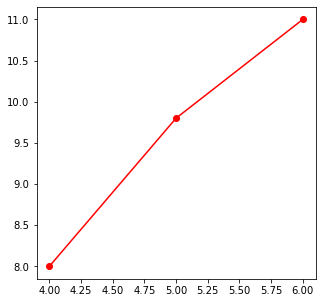

In [80]:
# as a test -- let's make a simple plot

# 1. make the plot
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.plot([4, 5, 6], [8, 9.8, 11], color='red', marker='o')

plt.show()

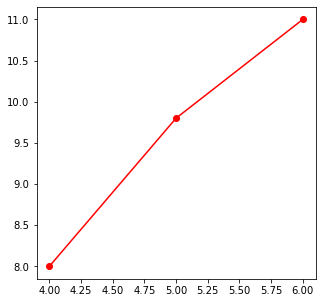

In [81]:
# step 2 (1.5)
selected_color = 'red'
selected_marker = 'o'

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.plot([4, 5, 6], [8, 9.8, 11], color=selected_color, marker=selected_marker)

plt.show()

In [82]:
# step 3 -- make plot into a function that plots
#selected_color = 'red'
#selected_marker = 'o'

# defining the function phase
def make_plot(selected_color, selected_marker):
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    ax.plot([4, 5, 6], [8, 9.8, 11], color=selected_color, marker=selected_marker)
    plt.show()

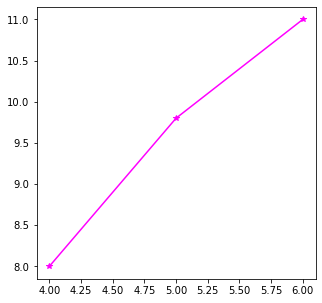

In [83]:
# before making it interactive, let's try calling it a bit
make_plot('magenta', '*')

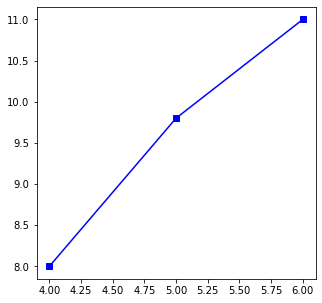

In [84]:
make_plot('blue', 's')

In [87]:
#make_plot('weirdcolor','o') # this breaks things because we only have set colors & markers

We want to make our plot interactive, but we want only a select set of options for colors and for our markers -- this is us thinking a bit about our user and how our user might brake our visualization.

In [88]:
colors_list = ['red', 'green', 'magenta', 'blue', 'black'] # colors for plot
markers_list = ['o', '.', 's', '*'] # markers list

In [90]:
# match up: function parameter = our options from our list
@ipywidgets.interact(selected_color=colors_list, selected_marker=markers_list)
def make_plot(selected_color, selected_marker):
    fig, ax = plt.subplots(1,1, figsize=(3,3))
    ax.plot([4, 5, 6], [8, 9.8, 11], color=selected_color, marker=selected_marker)
    plt.show()

interactive(children=(Dropdown(description='selected_color', options=('red', 'green', 'magenta', 'blue', 'blac…

In [92]:
# this won't work because fig is itself not interactive

#fig, ax = plt.subplots(1,1, figsize=(3,3))

#@ipywidgets.interact(selected_color=colors_list, selected_marker=markers_list)
#def make_plot(selected_color, selected_marker):
#    ax.plot([4, 5, 6], [8, 9.8, 11], color=selected_color, marker=selected_marker)
#    plt.show()

## By their powers combined!  Interactive maps!!

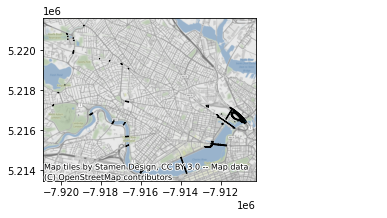

In [93]:
# step 1: make a plot
fig, ax = plt.subplots(1,1, figsize=(7,3))

bridges.plot(ax=ax, edgecolor='black')
ctx.add_basemap(ax=ax)

plt.show()

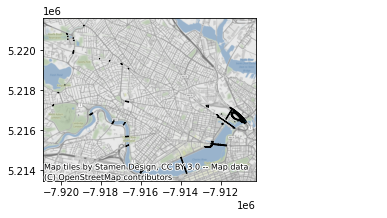

In [94]:
# step 1.5 make change parameters as variables
selected_color = 'black'

fig, ax = plt.subplots(1,1, figsize=(7,3))

bridges.plot(ax=ax, edgecolor=selected_color)
ctx.add_basemap(ax=ax)

plt.show()

In [95]:
# step 2: put the plot into a function and make the changable parameter as an input
#selected_color = 'black'

def my_map_plot(selected_color): # defining my function
    fig, ax = plt.subplots(1,1, figsize=(7,3))
    bridges.plot(ax=ax, edgecolor=selected_color)
    ctx.add_basemap(ax=ax)
    plt.show()

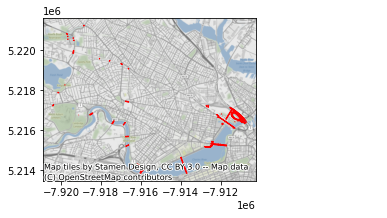

In [96]:
# as a check I'm going to call the function a few times with different inputs
my_map_plot('red')

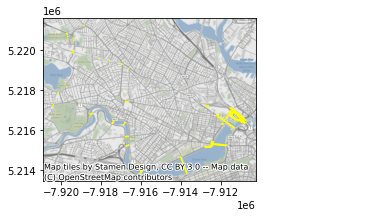

In [97]:
my_map_plot('yellow')

In [98]:
# 3. decorate with ipywidgets.interact
colors_list = ['blue', 'red', 'yellow', 'magenta']

# match up function inputs with the list of options
@ipywidgets.interact(selected_color=colors_list)
def my_map_plot(selected_color): # defining my function
    fig, ax = plt.subplots(1,1, figsize=(7,3))
    bridges.plot(ax=ax, edgecolor=selected_color)
    ctx.add_basemap(ax=ax)
    plt.show()

interactive(children=(Dropdown(description='selected_color', options=('blue', 'red', 'yellow', 'magenta'), val…

In [99]:
# now that we have one thing working, we can add more interactivity

colors_list = ['blue', 'red', 'yellow', 'magenta']

# match up function inputs with the list of options
@ipywidgets.interact(selected_color=colors_list, alpha=0.5)
def my_map_plot(selected_color, alpha): # defining my function
    fig, ax = plt.subplots(1,1, figsize=(7,3))
    bridges.plot(ax=ax, edgecolor=selected_color, alpha=alpha)
    ctx.add_basemap(ax=ax)
    plt.show()

interactive(children=(Dropdown(description='selected_color', options=('blue', 'red', 'yellow', 'magenta'), val…

Clearly things are going wrong because there are "alphas" that are outside of 0 & 1.

We are going to try to be more explicit with @ipywidgets.interact function about what we are trying to do.

We are going to make our own custom widget and set its inputs between 0-1 -- give this as an input to @ipywidgets.interact.

In [106]:
alpha_widget = ipywidgets.FloatSlider(value = 0.5, min=0.0, max=1.0) 
# starting with 0.5
# going between 0.0 & 1.0

In [107]:
alpha_widget

FloatSlider(value=0.5, max=1.0)

In [108]:
@ipywidgets.interact(selected_color=colors_list, alpha=alpha_widget) # only change: inputs
def my_map_plot(selected_color, alpha): # defining my function
    fig, ax = plt.subplots(1,1, figsize=(7,3))
    bridges.plot(ax=ax, edgecolor=selected_color, alpha=alpha)
    ctx.add_basemap(ax=ax)
    plt.show()

interactive(children=(Dropdown(description='selected_color', options=('blue', 'red', 'yellow', 'magenta'), val…